In [2]:
%pylab inline
import pandas as pd
import fastparquet 
import os,sys

Populating the interactive namespace from numpy and matplotlib


In [3]:
sys.path.insert(0,"/mnt/lanlep2019/src/main")

In [4]:
!ln -s /mnt/lanlep2019 ~/

ln: failed to create symbolic link ‘/home/hadoop/lanlep2019’: File exists


In [5]:
os.chdir("/mnt/lanlep2019/")

In [6]:
!pwd

/mnt/lanlep2019


# once

In [7]:
!pip install hyperopt


    100% |████████████████████████████████| 122kB 3.5MB/s ta 0:00:01
    100% |████████████████████████████████| 1.7MB 862kB/s  eta 0:00:01
    100% |████████████████████████████████| 829kB 1.7MB/s  eta 0:00:01
    100% |████████████████████████████████| 419kB 3.4MB/s  eta 0:00:01
  Running setup.py bdist_wheel for networkx ... done
  Stored in directory: /home/hadoop/.cache/pip/wheels/68/f8/29/b53346a112a07d30a5a84d53f19aeadaa1a474897c0423af91
  Running setup.py bdist_wheel for future ... done
  Stored in directory: /home/hadoop/.cache/pip/wheels/0c/61/d2/d6b7317325828fbb39ee6ad559dbe4664d0896da4721bf379e
Successfully built networkx future
You are using pip version 9.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


# data

In [7]:
import lightgbm as lgb

In [8]:
import data
import config

In [9]:
reload (data)

<module 'data' from '/mnt/lanlep2019/src/main/data.pyc'>

In [10]:
if 1:
    strategy = {'type':'byquake', "test_quakes":[[ 9,  4,  6] , [15,  1,  5], [10, 14,  3],  [7, 11,  2],  [8, 13, 12]]}
    types=['kaggle','signal','kaggle2'] +['fwv','fwvext']+['fwvsoftmax','fwvdis','fwvdis2','fwvcos']+\
        ['fwvextsoftmax','fwvextdis','fwvextdis2','fwvextcos'] + ['fwvwholereg', 'fwvextwholereg']
    traintest = data.TrainTest('dense', coverages=None, types=types, transform=None, valid_strategy=strategy)

In [11]:
traintest.num_dataset()

5

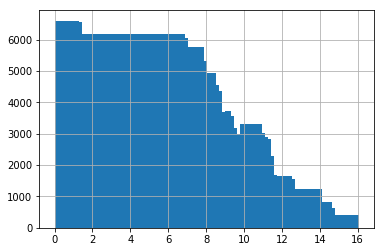

In [12]:
traintest.ydf.hist(bins=100);

In [13]:
np.abs(traintest.ydf-traintest.ydf.median()).mean()

3.02918898210172

In [14]:
testdf=traintest.get_test_data()
testdf.shape

(2624, 450)

In [15]:
datadf=traintest.traindf
datadf.head()

mean        std    max    min  mean_change_abs  \
index                                                                      
quake_03_0200_105000  4.364120   6.262442  119.0 -119.0         0.000000   
quake_06_0120_099000  4.220713  10.566183  328.0 -282.0         0.000007   
quake_07_0296_013500  4.430427   7.501472  159.0 -116.0        -0.000007   
quake_03_0090_034500  4.798247   4.658487  108.0  -76.0         0.000013   
quake_08_0137_055500  4.691327   5.605683  172.0 -171.0        -0.000007   

                      mean_change_rate  abs_max  abs_min  std_first_50000  \
index                                                                       
quake_03_0200_105000      75149.867188    119.0      0.0         4.398645   
quake_06_0120_099000      75124.750000    328.0      0.0         4.937372   
quake_07_0296_013500      74910.898438    159.0      0.0         7.806824   
quake_03_0090_034500      74906.742188    108.0      0.0         5.020636   
quake_08_0137_055500      74864.296875    172.0      0.0         7.771729   

                      std_last_50000       ...         fwvextdis_pca10_2  \
index                                      ...                             
quake_03_0200_105000        7.115628       ...                 -0.867152   
quake_06_0120_099000       17.188982       ...                  0.599042   
quake_07_0296_013500        8.044850       ...                  0.276776   
quake_03_0090_034500        4.439272       ...                 -1.211162   
quake_08_0137_055500        4.222545       ...                 -1.418130   

                      fwvextdis_pca10_3  fwvextdis_pca10_4  fwvextdis_pca10_5  \
index                                                                           
quake_03_0200_105000           0.251729           0.083587           0.029462   
quake_06_0120_099000          -0.058171          -0.059255           0.019930   
quake_07_0296_013500          -0.041059           0.105883           0.042710   
quake_03_0090_034500           0.021516          -0.055162           0.053457   
quake_08_0137_055500          -0.099060          -0.037935          -0.052247   

                      fwvextdis_pca10_6  fwvextdis_pca10_7  fwvextdis_pca10_8  \
index                                                                           
quake_03_0200_105000          -0.022975          -0.039655           0.000274   
quake_06_0120_099000           0.002073           0.007824          -0.008991   
quake_07_0296_013500          -0.009792          -0.018473           0.035101   
quake_03_0090_034500          -0.030760          -0.066036           0.022193   
quake_08_0137_055500           0.054380          -0.019536           0.042780   

                      fwvextdis_pca10_9  fwv_wholereg  fwvext_wholereg  
index                                                                   
quake_03_0200_105000           0.028007     93.940635        -6.822180  
quake_06_0120_099000           0.020008     20.000997       -12.672698  
quake_07_0296_013500          -0.005669     37.947210       -38.633617  
quake_03_0090_034500           0.016614     80.679887        11.746026  
quake_08_0137_055500           0.010705     53.077711         4.727631  

[5 rows x 450 columns]

In [16]:
ydf=traintest.ydf
ydf.head()

index
quake_03_0200_105000    0.998098
quake_06_0120_099000    2.318898
quake_07_0296_013500    4.532197
quake_03_0090_034500    5.302996
quake_08_0137_055500    2.514399
Name: y, dtype: float64

In [17]:
qdf=pd.DataFrame(datadf.index.map(lambda u: u.split("_")[1]).astype(np.int8),index=datadf.index)
qdf.head()

index
index                      
quake_03_0200_105000      3
quake_06_0120_099000      6
quake_07_0296_013500      7
quake_03_0090_034500      3
quake_08_0137_055500      8

In [18]:
qdf['index'].value_counts().to_frame().sort_index().T

0      1      2      3      4      5      6      7      8      9   \
index  3672  29520  36295  22631  32480  20574  18018  41240  20192  24635   

          10     11     12     13     14     15    16  
index  29228  28196  22560  21885  37761  24179  4674

In [19]:
qdf.shape,ydf.shape,datadf.shape

((417740, 1), (417740,), (417740, 450))

In [20]:
quakes=range(1,16)
quakes

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [21]:
idx=qdf['index'].isin(set(quakes)).values
ydf=ydf[idx]
qdf=qdf[idx]
datadf=datadf[idx]

In [22]:
qdf.shape,ydf.shape,datadf.shape

((409394, 1), (409394,), (409394, 450))

In [23]:
quake_duration= config.quake_length
quake_duration

{1: 11.540566395569977,
 2: 14.180203599212305,
 3: 8.856243408447243,
 4: 12.693878224447909,
 5: 8.05509606419685,
 6: 7.059247509412199,
 7: 16.107000305270187,
 8: 7.906144318432936,
 9: 9.637176132666621,
 10: 11.4267247041647,
 11: 11.0245547308509,
 12: 8.828581201128031,
 13: 8.565787763958841,
 14: 14.7515396785698,
 15: 9.459497978791095}

In [24]:
for qno in quakes:
    r=11/quake_duration[qno]
    print qno, r
    ydf.loc[qdf['index']==qno] *= r

1 0.95315945708
2 0.775729341475
3 1.24206161605
4 0.866559439558
5 1.36559513534
6 1.55823973948
7 0.682932873379
8 1.39132294542
9 1.14141319496
10 0.962655553957
11 0.997772723575
12 1.24595331338
13 1.28417844373
14 0.745684873558
15 1.16285240767


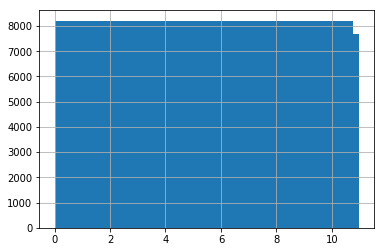

In [25]:
ydf.hist(bins=50);

In [26]:
import utils
n_thread= utils.get_num_thread()
n_thread

7

In [27]:
w={k:v/np.mean(config.quake_weights.values()) for k,v in config.quake_weights.items()}
wdf=qdf['index'].map(lambda u: w[u])
wdf.head()

index
quake_03_0200_105000    0.416667
quake_06_0120_099000    0.416667
quake_07_0296_013500    1.111111
quake_03_0090_034500    0.416667
quake_08_0137_055500    0.416667
Name: index, dtype: float64

In [28]:
GNO=201
!mkdir -p input/sub/{GNO}

In [29]:
sub_path=os.path.join(config.INPUT_PATH, "sub", str(GNO))
sub_path

'/home/hadoop/lanlep2019/input/sub/201'

In [30]:
def make_sub(model, qno):
    fname =os.path.join(sub_path, "sub{}_q{}_a11_s{}.csv".format(GNO,qno, randseed))
    print "write to " + fname    
    p = model.predict(testdf.values, num_iteration = model.best_iteration)
    p = pd.DataFrame(p, index=testdf.index).reset_index()
    p.columns=['seg_id','time_to_failure']
    p.to_csv(fname,index=None)

                        
    

In [31]:
def train_quake(qno,params,n_thread):
    assert(qno in quakes)
    print 'valid quake', qno
    teidx=(qdf['index']==qno).values
    tridx=~qdf['index'].isin({qno,0,16}).values
    
    Xtr,ytr,Xte,yte=datadf[tridx],ydf[tridx],datadf[teidx],ydf[teidx]
    Wtr,Wte=wdf[tridx],wdf[teidx]
    Xtr,ytr,Xte,yte, Wtr, Wte=[u.values for u in [Xtr,ytr,Xte,yte, Wtr,Wte]]
    print Xtr.shape,ytr.shape,Xte.shape,yte.shape
    model = lgb.LGBMRegressor(n_estimators = 5000, n_jobs = n_thread, **params)
    model.fit(Xtr, ytr, sample_weight=None,
                    eval_set=[(Xtr, ytr), (Xte, yte)], eval_metric='mae', eval_sample_weight=[None,None],
                    verbose=100, early_stopping_rounds=100)
    make_sub(model, qno)
    return model.best_score['valid_1']['l1'], model.best_iteration

In [33]:
params = {'num_leaves': 54,
          'min_data_in_leaf': 79,
          'objective': 'regression_l2',
          'max_depth': -1,
          'learning_rate': 0.01,
          "boosting": "gbdt",
          "bagging_freq": 5,
          "bagging_fraction": 0.8126672064208567,
          "metric": 'mae',
          'seed': 1,
          "verbosity": -1,
          'reg_alpha': 0.1302650970728192,
          'reg_lambda': 0.3603427518866501
         }

In [34]:
best_mae=1e10

In [35]:
def lgbcv(learning_rate, num_leaves,reg_alpha,reg_lambda,max_depth,subsample,colsample_bytree, min_data_in_leaf,min_sum_hessian_in_leaf, seed):
    d=locals()
    newparams=params.copy()
    newparams.update(d)    
    newparams['num_leaves']=int(num_leaves)
    newparams['max_depth']=int(max_depth)
    newparams['min_data_in_leaf']=int(min_data_in_leaf)
    scores=[]
    validScores={}
    for qno in quakes:
        s=train_quake(qno,newparams,n_thread)
        print "quake ", qno,s
        validScores[qno]=s
        scores.append(s[0])
    r=np.mean(scores)
    global best_mae
    if best_mae>r: best_mae=r
    print "mean score", r
    return r

In [36]:
best={'colsample_bytree': 0.7462366531860389,
 'learning_rate': 0.02203709896757661,
 'max_depth': 6.241579932057453,
 'min_data_in_leaf': 11.408663250331111,
 'min_sum_hessian_in_leaf': 0.020116578929822385,
 'num_leaves': 92.39862799020347,
 'reg_alpha': 0.14838935227908107,
 'reg_lambda': 3.196684038407483,
 'subsample': 0.8965789984593165}



In [37]:
scores=[]
for _ in range(5):
    randseed=np.random.randint(low=1, high=11111111)
    print 'seed',randseed
    best['seed']=randseed
    a=lgbcv(**best)
    scores.append(a)

seed 7329287
valid quake 1
(379874, 450) (379874,) (29520, 450) (29520,)


/home/hadoop/miniconda2/lib/python2.7/site-packages/lightgbm/sklearn.py:258: LGBMDeprecationWarning: The `seed` parameter is deprecated and will be removed in next version. Please use `random_state` instead.
  'Please use `random_state` instead.', LGBMDeprecationWarning)


Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.07572	valid_1's l1: 1.32187
[200]	training's l1: 0.916477	valid_1's l1: 1.19147
[300]	training's l1: 0.856099	valid_1's l1: 1.18526
Early stopping, best iteration is:
[291]	training's l1: 0.862017	valid_1's l1: 1.18471
write to /home/hadoop/lanlep2019/input/sub/201/sub201_q1_a11_s7329287.csv
quake  1 (1.184713968274679, 291)
valid quake 2
(373099, 450) (373099,) (36295, 450) (36295,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.06552	valid_1's l1: 1.46236
[200]	training's l1: 0.90738	valid_1's l1: 1.36132
[300]	training's l1: 0.846803	valid_1's l1: 1.34992
[400]	training's l1: 0.795764	valid_1's l1: 1.34761
Early stopping, best iteration is:
[396]	training's l1: 0.798475	valid_1's l1: 1.34751
write to /home/hadoop/lanlep2019/input/sub/201/sub201_q2_a11_s7329287.csv
quake  2 (1.347506442517087, 396)
valid quake 3
(386763, 450) (386763,) (22631, 450) (22631,)
Tra

Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.1005	valid_1's l1: 0.848934
[200]	training's l1: 0.937117	valid_1's l1: 0.835653
Early stopping, best iteration is:
[133]	training's l1: 1.01818	valid_1's l1: 0.822364
write to /home/hadoop/lanlep2019/input/sub/201/sub201_q3_a11_s5066323.csv
quake  3 (0.8223644729396705, 133)
valid quake 4
(376914, 450) (376914,) (32480, 450) (32480,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.08553	valid_1's l1: 1.22047
[200]	training's l1: 0.922288	valid_1's l1: 1.14642
[300]	training's l1: 0.864532	valid_1's l1: 1.14197
[400]	training's l1: 0.815404	valid_1's l1: 1.14078
Early stopping, best iteration is:
[357]	training's l1: 0.835627	valid_1's l1: 1.13969
write to /home/hadoop/lanlep2019/input/sub/201/sub201_q4_a11_s5066323.csv
quake  4 (1.139687410085794, 357)
valid quake 5
(388820, 450) (388820,) (20574, 450) (20574,)
Training until validation scores don't improve for 1

[100]	training's l1: 1.07864	valid_1's l1: 1.35943
[200]	training's l1: 0.921424	valid_1's l1: 1.33464
Early stopping, best iteration is:
[161]	training's l1: 0.958647	valid_1's l1: 1.3304
write to /home/hadoop/lanlep2019/input/sub/201/sub201_q5_a11_s6257183.csv
quake  5 (1.330400628858334, 161)
valid quake 6
(391376, 450) (391376,) (18018, 450) (18018,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.08264	valid_1's l1: 1.41472
[200]	training's l1: 0.920506	valid_1's l1: 1.35433
[300]	training's l1: 0.864954	valid_1's l1: 1.35587
Early stopping, best iteration is:
[210]	training's l1: 0.913256	valid_1's l1: 1.35236
write to /home/hadoop/lanlep2019/input/sub/201/sub201_q6_a11_s6257183.csv
quake  6 (1.3523600200667183, 210)
valid quake 7
(368154, 450) (368154,) (41240, 450) (41240,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.05619	valid_1's l1: 1.48877
[200]	training's l1: 0.897507	valid_1's l1: 1.41681
[30

write to /home/hadoop/lanlep2019/input/sub/201/sub201_q6_a11_s181072.csv
quake  6 (1.3470659836235936, 236)
valid quake 7
(368154, 450) (368154,) (41240, 450) (41240,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.05811	valid_1's l1: 1.48203
[200]	training's l1: 0.897516	valid_1's l1: 1.40709
[300]	training's l1: 0.836234	valid_1's l1: 1.39777
[400]	training's l1: 0.786115	valid_1's l1: 1.39403
[500]	training's l1: 0.740032	valid_1's l1: 1.39632
Early stopping, best iteration is:
[424]	training's l1: 0.773969	valid_1's l1: 1.39382
write to /home/hadoop/lanlep2019/input/sub/201/sub201_q7_a11_s181072.csv
quake  7 (1.393823300264519, 424)
valid quake 8
(389202, 450) (389202,) (20192, 450) (20192,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.08048	valid_1's l1: 1.30771
[200]	training's l1: 0.91961	valid_1's l1: 1.30543
Early stopping, best iteration is:
[118]	training's l1: 1.03009	valid_1's l1: 1.29329
write

[100]	training's l1: 1.08065	valid_1's l1: 1.31337
[200]	training's l1: 0.918575	valid_1's l1: 1.3096
Early stopping, best iteration is:
[126]	training's l1: 1.01241	valid_1's l1: 1.29536
write to /home/hadoop/lanlep2019/input/sub/201/sub201_q8_a11_s9573649.csv
quake  8 (1.2953602391606815, 126)
valid quake 9
(384759, 450) (384759,) (24635, 450) (24635,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.10033	valid_1's l1: 0.978521
[200]	training's l1: 0.934807	valid_1's l1: 0.932237
[300]	training's l1: 0.876081	valid_1's l1: 0.929936
[400]	training's l1: 0.824628	valid_1's l1: 0.927229
[500]	training's l1: 0.776627	valid_1's l1: 0.927426
[600]	training's l1: 0.733381	valid_1's l1: 0.925137
[700]	training's l1: 0.696662	valid_1's l1: 0.925724
Early stopping, best iteration is:
[648]	training's l1: 0.714847	valid_1's l1: 0.924581
write to /home/hadoop/lanlep2019/input/sub/201/sub201_q9_a11_s9573649.csv
quake  9 (0.9245809434891293, 648)
valid quake 1

In [38]:
scores,np.mean(scores)

([1.163761746358584,
  1.164893181755668,
  1.163783128253571,
  1.1634977278078151,
  1.1622513986558372],
 1.1636374365662951)

In [39]:
files= !ls /mnt/lanlep2019/input/sub/201/sub201*
len(files)

75

In [40]:
b=pd.concat([pd.read_csv(u, index_col=0) for u in files], axis=1)
b.columns=[  (u.split("/")[-1].split('.')[0]) for u in files]

In [41]:
b.head()

sub201_q10_a11_s181072  sub201_q10_a11_s5066323  \
seg_id                                                        
seg_05a1b0                3.981011                 3.829109   
seg_f0181d                4.206428                 4.237036   
seg_5b7325                3.540790                 3.410953   
seg_c6b514                2.864736                 2.499879   
seg_52c139                9.930636                 9.971693   

            sub201_q10_a11_s6257183  sub201_q10_a11_s7329287  \
seg_id                                                         
seg_05a1b0                 3.767884                 3.999449   
seg_f0181d                 4.335854                 4.152812   
seg_5b7325                 3.455341                 3.415675   
seg_c6b514                 2.746331                 2.749858   
seg_52c139                10.048428                 9.874854   

            sub201_q10_a11_s9573649  sub201_q11_a11_s181072  \
seg_id                                                        
seg_05a1b0                 3.857987                4.100538   
seg_f0181d                 4.265170                4.150555   
seg_5b7325                 3.530922                3.320612   
seg_c6b514                 2.780646                2.770836   
seg_52c139                10.019656               10.126530   

            sub201_q11_a11_s5066323  sub201_q11_a11_s6257183  \
seg_id                                                         
seg_05a1b0                 3.684356                 4.081037   
seg_f0181d                 4.220363                 4.157727   
seg_5b7325                 3.274428                 2.915269   
seg_c6b514                 2.692574                 2.881807   
seg_52c139                10.166498                10.024901   

            sub201_q11_a11_s7329287  sub201_q11_a11_s9573649  \
seg_id                                                         
seg_05a1b0                 3.983442                 3.994781   
seg_f0181d                 4.165278                 4.185884   
seg_5b7325                 3.402533                 3.218994   
seg_c6b514                 2.868066                 2.906653   
seg_52c139                10.198588                10.157261   

                     ...            sub201_q8_a11_s181072  \
seg_id               ...                                    
seg_05a1b0           ...                         4.094533   
seg_f0181d           ...                         4.323616   
seg_5b7325           ...                         3.809238   
seg_c6b514           ...                         2.936666   
seg_52c139           ...                         9.916357   

            sub201_q8_a11_s5066323  sub201_q8_a11_s6257183  \
seg_id                                                       
seg_05a1b0                4.143026                3.972685   
seg_f0181d                4.225186                4.169234   
seg_5b7325                3.814874                3.647748   
seg_c6b514                2.899039                2.985884   
seg_52c139               10.011557                9.995292   

            sub201_q8_a11_s7329287  sub201_q8_a11_s9573649  \
seg_id                                                       
seg_05a1b0                4.098382                4.135735   
seg_f0181d                4.058189                4.274944   
seg_5b7325                3.614816                3.718424   
seg_c6b514                3.010236                2.864988   
seg_52c139               10.006534                9.988095   

            sub201_q9_a11_s181072  sub201_q9_a11_s5066323  \
seg_id                                                      
seg_05a1b0               3.970819                3.971784   
seg_f0181d               4.128519                4.250959   
seg_5b7325               3.164011                3.527252   
seg_c6b514               2.876546                2.717361   
seg_52c139              10.225206               10.236969   

            sub201_q9_a11_s6257183  sub201_q9_a11_s7329

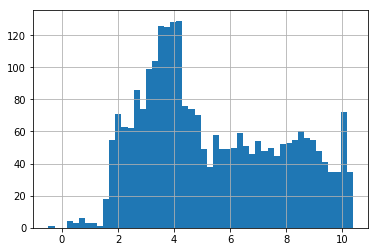

In [42]:
b.mean(1).hist(bins=50);

In [43]:
np.abs(b.median(1)-b.mean(1)).mean()

0.021114002185278875

In [44]:
b.mean(1).mean(),b.median(1).mean()

(5.384680364789938, 5.396688962634782)

In [45]:
p=b.mean(1).to_frame().reset_index()
p.columns=['seg_id','time_to_failure']
fname =os.path.join(sub_path, "{}_sub201_a11.csv".format('mean'))
p.to_csv(fname,index=None)

In [46]:
p=b.median(1).to_frame().reset_index()
p.columns=['seg_id','time_to_failure']
fname =os.path.join(sub_path, "{}_sub201_a11.csv".format('median'))
p.to_csv(fname,index=None)